In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("Dataset.csv", encoding="ISO-8859-1")
df.head()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,...,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

In [4]:
df.describe()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
count,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656
unique,3,2,4,4,3,4,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2
top,CHINA,YES,Millennials,High,Female,University Graduate,YES,Metropolitan,YES,YES,...,NO,NO,NO,NO,NO,YES,YES,NO,YES,YES
freq,252,635,366,230,361,347,425,438,485,554,...,359,359,406,462,407,329,432,374,342,480


In [5]:
df.nunique()

Country                             3
Online_Consumer                     2
Age                                 4
Annual_Salary                       4
Gender                              3
Education                           4
Payment_Method_Credit/Debit         2
Living_Region                       3
Online_Service_Preference           2
AI_Endorsement                      2
AI_Privacy_No_Trust                 2
AI_Enhance_Experience               2
AI_Satisfication                    2
AI_Tools_Used _Chatbots             2
AI_Tools_Used_Virtual_Assistant     2
AI_Tools_Used_Voice&Photo_Search    2
Payment_Method_COD                  2
Payment_Method_Ewallet              2
Product_Category_Appliances         2
Product_Category_Electronics        2
Product_Category_Groceries          2
Product_Category_Personal_Care      2
Product_Category_Clothing           2
dtype: int64

In [6]:
df.columns

Index(['Country', 'Online_Consumer', 'Age', 'Annual_Salary', 'Gender',
       'Education', 'Payment_Method_Credit/Debit', 'Living_Region',
       'Online_Service_Preference', 'AI_Endorsement', 'AI_Privacy_No_Trust ',
       'AI_Enhance_Experience', 'AI_Satisfication', 'AI_Tools_Used _Chatbots',
       'AI_Tools_Used_Virtual_Assistant', 'AI_Tools_Used_Voice&Photo_Search',
       'Payment_Method_COD', 'Payment_Method_Ewallet',
       'Product_Category_Appliances', 'Product_Category_Electronics',
       'Product_Category_Groceries', 'Product_Category_Personal_Care',
       'Product_Category_Clothing'],
      dtype='object')

In [7]:
df.duplicated

<bound method DataFrame.duplicated of     Country Online_Consumer          Age Annual_Salary  Gender  \
0     INDIA             YES        Gen X   Medium High  Female   
1     INDIA             YES        Gen Z           Low    Male   
2     INDIA             YES        Gen X   Medium High    Male   
3     INDIA             YES        Gen X          High    Male   
4     INDIA             YES        Gen Z           Low    Male   
..      ...             ...          ...           ...     ...   
651  CANADA             YES        Gen X        Medium  Female   
652  CANADA             YES  Millennials   Medium High    Male   
653  CANADA             YES  Millennials          High  Female   
654  CANADA             YES  Millennials          High  Female   
655  CANADA             YES  Millennials        Medium    Male   

               Education Payment_Method_Credit/Debit   Living_Region  \
0        Masters Degree                          NO    Metropolitan   
1    University Graduate 

In [8]:
df.shape

(656, 23)

In [9]:
df.duplicated().sum()

8

In [10]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(648, 23)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Country                             0
Online_Consumer                     0
Age                                 0
Annual_Salary                       0
Gender                              0
Education                           0
Payment_Method_Credit/Debit         0
Living_Region                       0
Online_Service_Preference           0
AI_Endorsement                      0
AI_Privacy_No_Trust                 0
AI_Enhance_Experience               0
AI_Satisfication                    0
AI_Tools_Used _Chatbots             0
AI_Tools_Used_Virtual_Assistant     0
AI_Tools_Used_Voice&Photo_Search    0
Payment_Method_COD                  0
Payment_Method_Ewallet              0
Product_Category_Appliances         0
Product_Category_Electronics        0
Product_Category_Groceries          0
Product_Category_Personal_Care      0
Product_Category_Clothing           0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           648 non-null    object
 1   Online_Consumer                   648 non-null    object
 2   Age                               648 non-null    object
 3   Annual_Salary                     648 non-null    object
 4   Gender                            648 non-null    object
 5   Education                         648 non-null    object
 6   Payment_Method_Credit/Debit       648 non-null    object
 7   Living_Region                     648 non-null    object
 8   Online_Service_Preference         648 non-null    object
 9   AI_Endorsement                    648 non-null    object
 10  AI_Privacy_No_Trust               648 non-null    object
 11  AI_Enhance_Experience             648 non-null    object
 12  AI_Satisfication      

In [16]:
df.head(5)

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,...,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES


In [17]:
print(df["Age"].dtype)  # Should be 'int64' or 'float64'
print(df["Age"].isna().sum(), "missing values")  # Count NaNs
print(df["Age"].describe())  # Check min, max, mean, etc.
print(df.head())  # Preview data

object
0 missing values
count             648
unique              4
top       Millennials
freq              358
Name: Age, dtype: object
  Country Online_Consumer    Age Annual_Salary  Gender            Education  \
0   INDIA             YES  Gen X   Medium High  Female      Masters Degree   
1   INDIA             YES  Gen Z           Low    Male  University Graduate   
2   INDIA             YES  Gen X   Medium High    Male  University Graduate   
3   INDIA             YES  Gen X          High    Male  University Graduate   
4   INDIA             YES  Gen Z           Low    Male  University Graduate   

  Payment_Method_Credit/Debit Living_Region Online_Service_Preference  \
0                          NO  Metropolitan                        NO   
1                         YES  Metropolitan                        NO   
2                         YES   Rural Areas                       YES   
3                         YES   Rural Areas                       YES   
4                      

In [18]:
df["Education"].describe()

count                     648
unique                      4
top       University Graduate
freq                      340
Name: Education, dtype: object

/Users/faizanarshad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


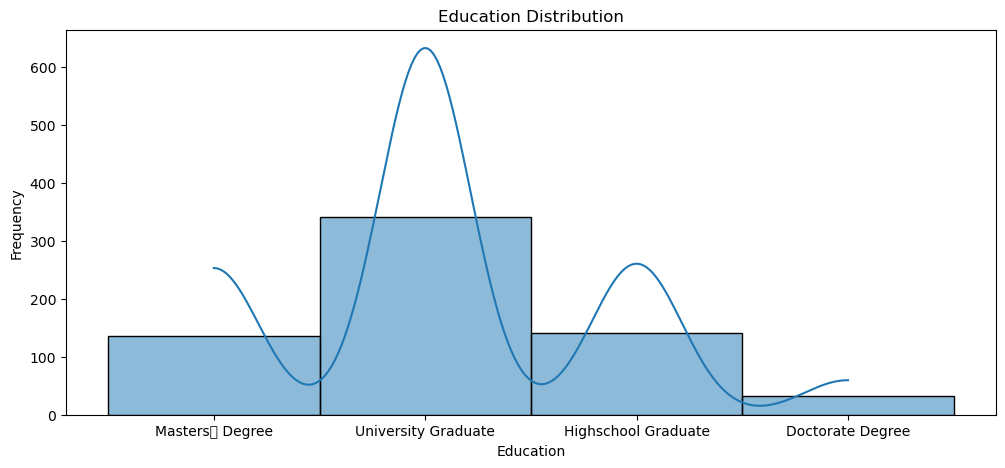

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="Education", bins=10, kde=True, palette="viridis")
plt.title("Education Distribution")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Clean and strip unwanted characters from multiple columns in one step
df[["Education", "Annual_Salary", "Age"]] = df[["Education", "Annual_Salary", "Age"]].apply(
    lambda col: col.str.replace(r"[^\w\s]", "", regex=True).str.strip()
)

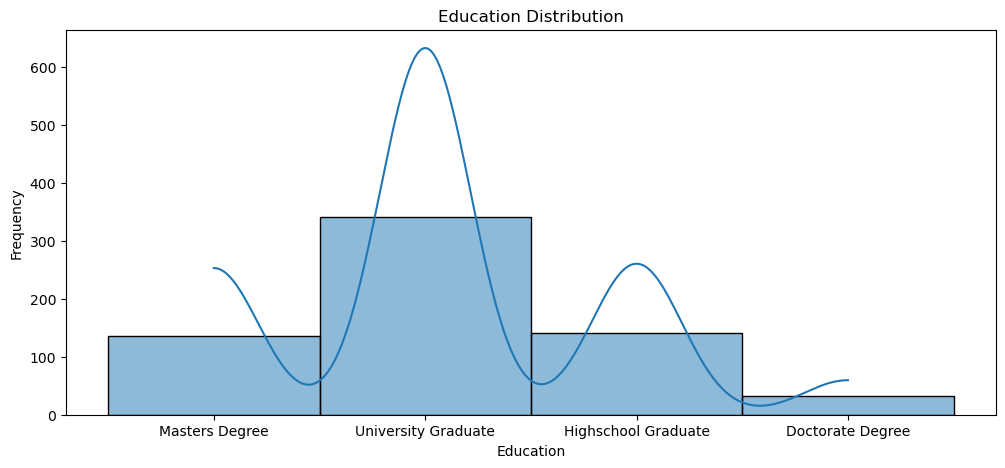

In [22]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="Education", bins=10, kde=True, palette="viridis")
plt.title("Education Distribution")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

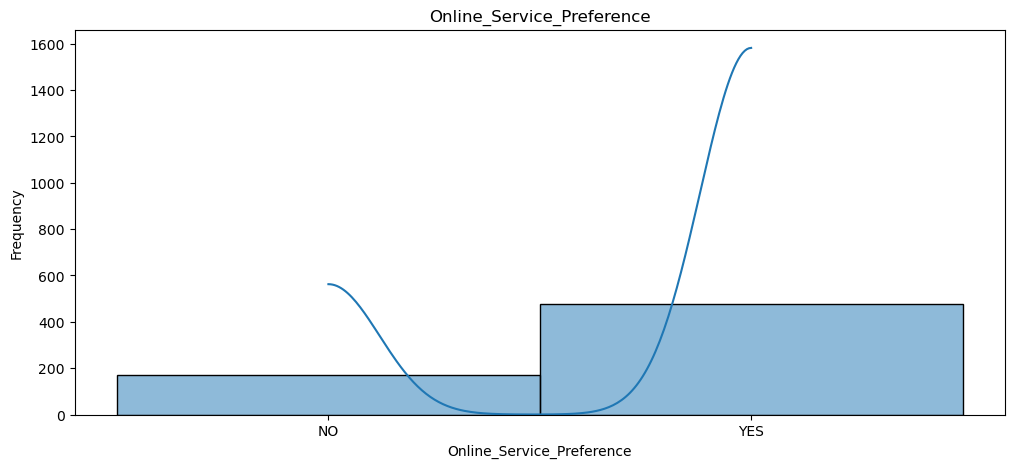

In [23]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="Online_Service_Preference", bins=10, kde=True, palette="viridis")
plt.title("Online_Service_Preference")
plt.xlabel("Online_Service_Preference")
plt.ylabel("Frequency")
plt.show()

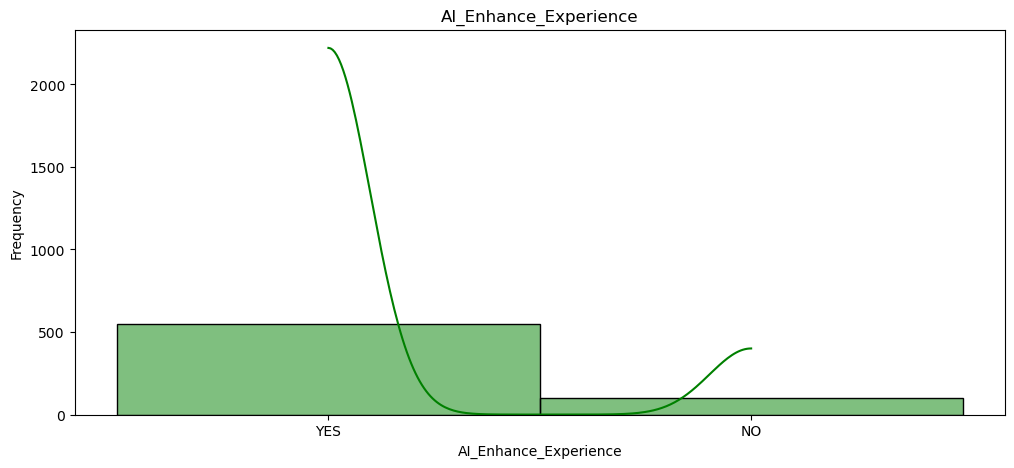

In [24]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="AI_Enhance_Experience", bins=10, kde=True, color="green")
plt.title("AI_Enhance_Experience")
plt.xlabel("AI_Enhance_Experience")
plt.ylabel("Frequency")
plt.show()


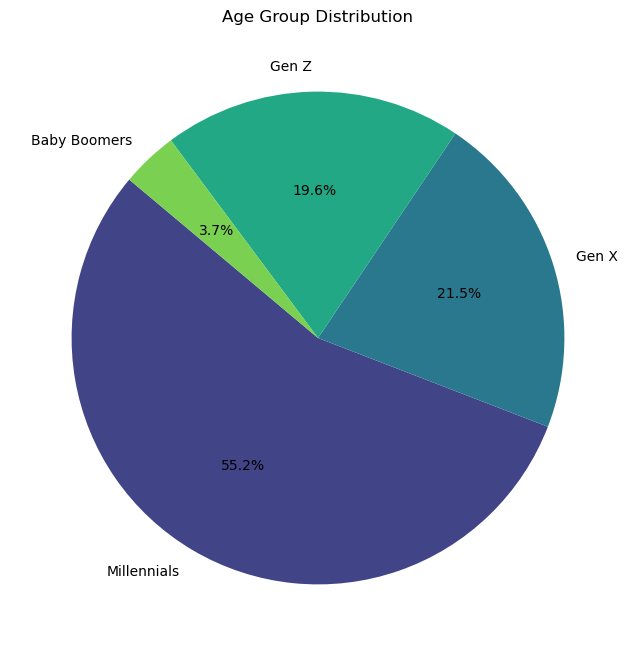

In [25]:
plt.figure(figsize=(8, 8))
data_counts = df["Age"].value_counts()
plt.pie(
    data_counts, labels=data_counts.index, autopct="%1.1f%%", 
    colors=sns.color_palette("viridis", len(data_counts)), startangle=140
)
plt.title("Age Group Distribution")
plt.show()

In [26]:
# Create an interactive box plot
fig = px.box(
    df, 
    x="Age", 
    y="AI_Satisfication", 
    color="Age",  # Different colors for each age group
    title="AI Satisfaction Levels Across Age Groups",
    template="plotly_white"  # Clean and professional theme
)

# Customize appearance
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Satisfaction Level",
    boxmode="group"  # Groups boxes for better comparison
)

# Show figure
fig.show()

In [27]:
# Data Preprocessing
# Drop irrelevant columns (e.g., 'Country', 'Online_Consumer')
data = df.drop(['Country', 'Online_Consumer'], axis=1)


In [28]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [29]:
# Separate features (X) and target (y)
X = data.drop('AI_Satisfication', axis=1)  # Features
y = data['AI_Satisfication']  # Target (Satisfaction)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Display dataset shape after preprocessing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((518, 20), (130, 20), (518,), (130,))

In [32]:
# Feature Scaling (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7846153846153846
Confusion Matrix:
 [[94  5]
 [23  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        99
           1       0.62      0.26      0.36        31

    accuracy                           0.78       130
   macro avg       0.71      0.60      0.62       130
weighted avg       0.76      0.78      0.75       130



In [36]:
# Feature Importance (for Random Forest)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))


Feature Importances:
 AI_Enhance_Experience               0.120820
Online_Service_Preference           0.084652
Annual_Salary                       0.078446
Education                           0.072466
Age                                 0.060822
Product_Category_Electronics        0.045080
Gender                              0.044526
Product_Category_Clothing           0.044327
AI_Privacy_No_Trust                 0.044313
Living_Region                       0.042824
AI_Endorsement                      0.042328
Product_Category_Appliances         0.041679
Product_Category_Groceries          0.038533
AI_Tools_Used_Virtual_Assistant     0.038313
Product_Category_Personal_Care      0.036251
Payment_Method_Ewallet              0.036049
AI_Tools_Used _Chatbots             0.035838
AI_Tools_Used_Voice&Photo_Search    0.033497
Payment_Method_COD                  0.032177
Payment_Method_Credit/Debit         0.027058
dtype: float64


In [37]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

In [38]:
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))

Accuracy: 0.8153846153846154
Confusion Matrix:
 [[92  7]
 [17 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        99
           1       0.67      0.45      0.54        31

    accuracy                           0.82       130
   macro avg       0.76      0.69      0.71       130
weighted avg       0.80      0.82      0.80       130



In [39]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)


In [40]:
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

Accuracy: 0.7076923076923077
Confusion Matrix:
 [[82 17]
 [21 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.37      0.32      0.34        31

    accuracy                           0.71       130
   macro avg       0.58      0.58      0.58       130
weighted avg       0.69      0.71      0.70       130



In [41]:
data.head()

,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,1,3,0,2,0,0,0,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1,2,1,1,3,1,0,0,1,1,1,...,1,1,1,1,1,1,1,0,0,0
2,1,3,1,3,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,0,0
3,1,0,1,3,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,0,1
4,2,1,1,3,0,1,1,1,1,1,...,1,0,0,1,1,1,0,1,0,1


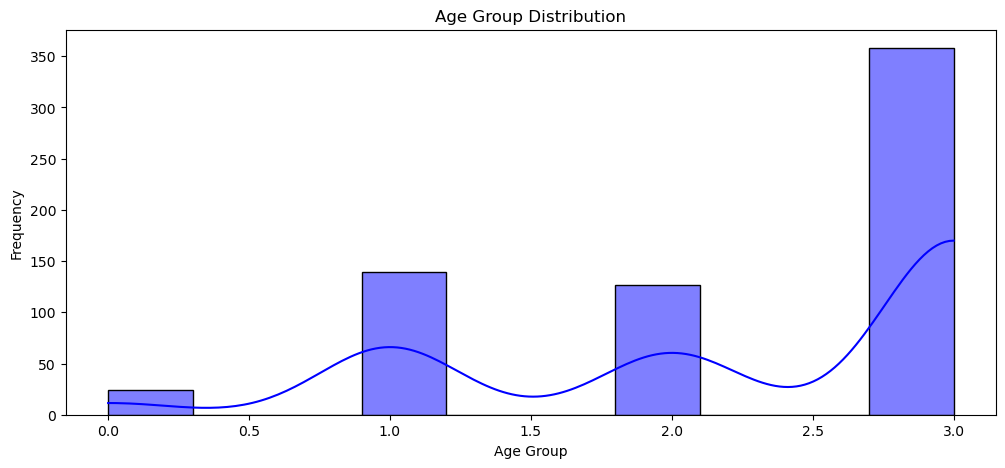

In [43]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, x="Age", bins=10, kde=True, color="blue")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

/Users/faizanarshad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



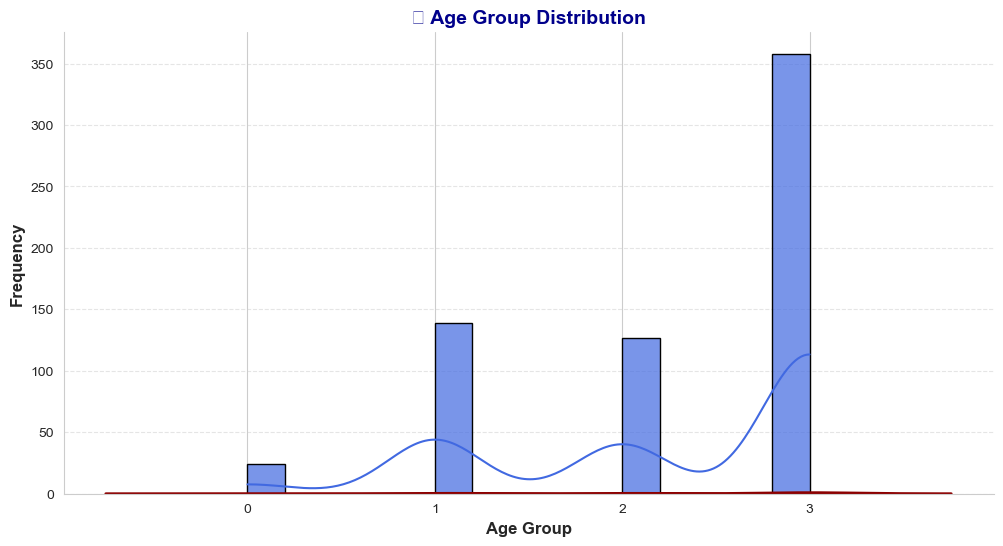

In [44]:
# Set Seaborn style
sns.set_style("whitegrid")  # Alternative: "darkgrid", "white", "ticks"

plt.figure(figsize=(12, 6))

# Enhanced histogram with KDE and transparency
sns.histplot(
    data=data, x="Age", bins=15, kde=True, 
    color="royalblue", edgecolor="black", alpha=0.7
)

# Adding KDE plot for smoothness
sns.kdeplot(data=data, x="Age", color="darkred", linewidth=2)

# Titles and Labels with styling
plt.title("📊 Age Group Distribution", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Age Group", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")

# Customize the grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Remove the top and right spines for a cleaner look
sns.despine()

plt.show()

In [ ]:
data.head(5)

In [ ]:
# Step 1: Load your dataset (ensure the correct path to the CSV)
graph = pd.read_csv("Dataset.csv", encoding="ISO-8859-1")

# Step 2: Select the relevant product category columns
product_columns = [
    'Product_Category_Appliances',
    'Product_Category_Electronics',
    'Product_Category_Groceries',
    'Product_Category_Personal_Care',
    'Product_Category_Clothing'
]

# Step 3: Convert 'YES' to 1 and 'NO' to 0 for the product categories (if needed)
graph[product_columns] = graph[product_columns].replace({'YES': 1, 'NO': 0})

# Step 4: Sum the values for each product category
category_totals = graph[product_columns].sum()

# Step 5: Create a bar chart using Plotly
fig = px.bar(
    x=category_totals.index, 
    y=category_totals.values,
    labels={'x': 'Product Category', 'y': 'Total Purchases'},
    title="Total Purchases by Product Category",
    color=category_totals.index,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Step 6: Customize the aesthetics
fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    plot_bgcolor='white',
    showlegend=False,
    template='plotly_dark',
    xaxis_title="Product Category",
    yaxis_title="Total Purchases",
    font=dict(family="Arial, sans-serif", size=12)
)

# Step 7: Display the graph
fig.show()



/Users/faizanarshad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



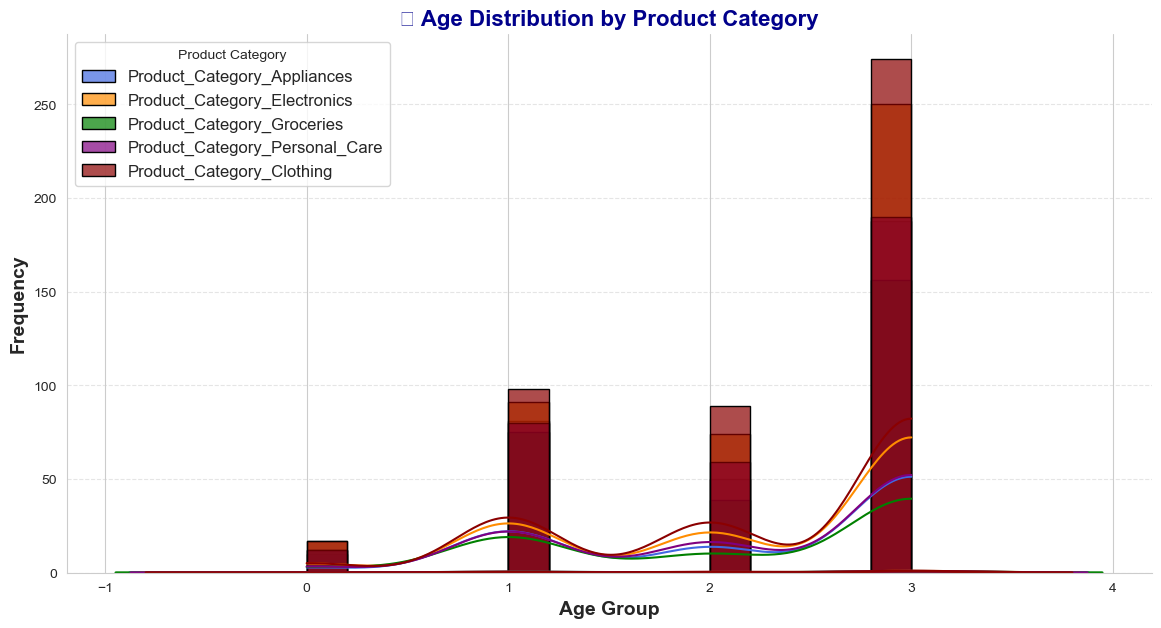

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")  # Alternative: "darkgrid", "white", "ticks"

# Create a figure with a larger size
plt.figure(figsize=(14, 7))

# Define custom colors for each product category
category_colors = {
    'Product_Category_Appliances': 'royalblue',
    'Product_Category_Electronics': 'darkorange',
    'Product_Category_Groceries': 'green',
    'Product_Category_Personal_Care': 'purple',
    'Product_Category_Clothing': 'darkred'
}

# Loop through each product category and create a plot for age distribution
for product in category_colors.keys():
    # Filter data for customers who have purchased this product (assuming binary values: 1 for purchased, 0 for not purchased)
    category_data = data[data[product] == 1]
    
    # Enhanced histogram with KDE for age distribution
    sns.histplot(
        data=category_data, x="Age", bins=15, kde=True, 
        color=category_colors[product], edgecolor="black", alpha=0.7, label=product
    )

    # Add KDE plot for smoothness
    sns.kdeplot(data=category_data, x="Age", color=category_colors[product], linewidth=2)

# Titles and Labels with styling
plt.title("📊 Age Distribution by Product Category", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Age Group", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")

# Customize the grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show legend
plt.legend(title="Product Category", fontsize=12)

plt.show()


In [54]:
df2= pd.read_csv("Dataset.csv", encoding="ISO-8859-1")
df2.head()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,...,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES


In [57]:
# Step 1: Prepare the dataset
# Create a unique customer ID for tracking (optional)
df2['Customer_ID'] = range(1, len(df2) + 1)


In [70]:
df2.head(2)

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,Customer_ID
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,YES,YES,YES,NO,YES,YES,YES,YES,YES,1
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,YES,YES,YES,YES,YES,NO,NO,NO,2


In [71]:
# Step 2: Create a User-Product Matrix
# Columns for product purchases
product_columns = [
    'Product_Category_Appliances',
    'Product_Category_Electronics',
    'Product_Category_Groceries',
    'Product_Category_Personal_Care',
    'Product_Category_Clothing'
]

# Convert 'YES/NO' to 1/0 for easier computation
df2[product_columns] = df2[product_columns].applymap(lambda x: 1 if x == "YES" else 0)

# Create a user-item matrix
user_product_matrix = df2[product_columns].values

# Step 3: Calculate Cosine Similarity between Users
user_similarity = cosine_similarity(user_product_matrix)

# Step 4: Recommendation Function
def recommend_products(customer_id, num_recommendations=3):
    # Get similar users
    similar_users = user_similarity[customer_id - 1]  # Customer_ID is 1-indexed
    similar_users_sorted = np.argsort(similar_users)[::-1]  # Sort in descending order
    
    # Aggregate product preferences from similar users
    aggregated_preferences = np.sum(user_product_matrix[similar_users_sorted], axis=0)

    # Exclude products the user already purchased
    user_purchases = user_product_matrix[customer_id - 1]
    recommended_products = (aggregated_preferences * (1 - user_purchases))

    # Get the top recommended products
    product_indices = recommended_products.argsort()[::-1][:num_recommendations]
    product_names = [product_columns[i] for i in product_indices]
    
    return product_names

# Step 5: Test the Recommendation System
customer_id = 1  # Change to any customer ID you want to recommend for
recommended_products = recommend_products(customer_id)
print(f"Recommended products for customer {customer_id}: {recommended_products}")


Recommended products for customer 1: ['Product_Category_Clothing', 'Product_Category_Personal_Care', 'Product_Category_Groceries']


In [72]:
# Step 5: Test the Recommendation System
customer_id = 15 # Change to any customer ID you want to recommend for
recommended_products = recommend_products(customer_id)
print(f"Recommended products for customer {customer_id}: {recommended_products}")


Recommended products for customer 15: ['Product_Category_Personal_Care', 'Product_Category_Appliances', 'Product_Category_Groceries']


In [73]:
# Step 5: Test the Recommendation System
customer_id = 2 # Change to any customer ID you want to recommend for
recommended_products = recommend_products(customer_id)
print(f"Recommended products for customer {customer_id}: {recommended_products}")

Recommended products for customer 2: ['Product_Category_Clothing', 'Product_Category_Personal_Care', 'Product_Category_Groceries']


In [74]:
# Step 5: Test the Recommendation System
customer_id = 51  # Change to any customer ID you want to recommend for
recommended_products = recommend_products(customer_id)
print(f"Recommended products for customer {customer_id}: {recommended_products}")

Recommended products for customer 51: ['Product_Category_Appliances', 'Product_Category_Clothing', 'Product_Category_Personal_Care']


In [76]:
import plotly.express as px

# Reset the index to make it a column
df_reset = df2.reset_index()

# Create two separate DataFrames: one for before and one for after purchases
df_before = df_reset.melt(id_vars=["index"], 
                          value_vars=[col for col in product_columns], 
                          var_name="Product_Type", 
                          value_name="Products_Purchased")

# Plot the "Before" product purchases
fig_before = px.line(
    df_before,
    x="index",
    y="Products_Purchased",
    color="Product_Type",
    title="Product Purchases Before Recommendations",
    labels={"index": "Customer Index", "Products_Purchased": "Number of Products Purchased"},
    template="plotly_dark",
)

# Plot the "After" product purchases

# Show both plots
fig_before.show()

In [81]:
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv("Dataset.csv", encoding="ISO-8859-1")

# Step 1: Convert 'YES' to 1 and 'NO' to 0
product_columns = [
    'Product_Category_Appliances', 'Product_Category_Electronics',
    'Product_Category_Groceries', 'Product_Category_Personal_Care',
    'Product_Category_Clothing'
]

# Replace 'YES' with 1 and 'NO' with 0
df[product_columns] = df[product_columns].replace({'YES': 1, 'NO': 0})

# Step 2: Calculate the number of products purchased per customer
df['Products_Purchased_Before'] = df[product_columns].sum(axis=1)

# Step 3: Create an advanced Plotly graph with custom annotations
fig = go.Figure()
# Step 2: Calculate the number of products purchased per customer
df['Products_Purchased_Before'] = df[product_columns].sum(axis=1)

# Step 3: Create an advanced Plotly graph with custom annotations
fig = go.Figure()
fig
# Add histogram trace
fig.add_trace(go.Histogram(
    x=df['Products_Purchased_Before'],
    nbinsx=6,  # Set the number of bins
    marker=dict(color='royalblue'),
    opacity=0.75
))

# Add annotations for 0 and 5
fig.add_annotation(
    x=0,
    y=0.05,  # Adjust based on your data scale
    text="0: No Products Purchased",
    showarrow=True,
    arrowhead=2,
    ax=-40,
    ay=-30,
    font=dict(size=12, color="white"),
    align="center",
)

fig.add_annotation(
    x=5,
    y=0.05,  # Adjust based on your data scale
    text="5: All Categories Purchased",
    showarrow=True,
    arrowhead=2,
    ax=40,
    ay=-30,
    font=dict(size=12, color="white"),
    align="center",
)

# Update layout for a more polished look
fig.update_layout(
    title="Product Purchases Before Recommendations",
    xaxis_title="Number of Products Purchased",
    yaxis_title="Frequency",
    template="plotly_dark",
    showlegend=False,
    plot_bgcolor="rgba(0, 0, 0, 0)",
    paper_bgcolor="rgba(0, 0, 0, 0)",
    font=dict(color="white"),
    margin=dict(t=50, b=50, l=50, r=50),
)

# Show the plot
fig.show()

In [91]:
import numpy as np

# Step 1: Convert product-related columns to numeric (if needed)
for col in product_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Step 2: Generate "After" data, ensuring the values stay between 0 and 1
np.random.seed(42)
for col in product_columns:
    df[col + '_After'] = np.minimum(1, df[col] + np.random.binomial(1, 0.2, size=len(df)))

# Step 3: Ensure all "After" columns are numeric
for col in [col + '_After' for col in product_columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Step 4: Visualize the difference in product purchases
import plotly.express as px

fig1 = px.bar(
    df,
    x=df.index,
    y=[col + '_After' for col in product_columns],
    title="Product Purchases After Recommendations",
    labels={"x": "Customer Index", "y": "Number of Products Purchased"},
    barmode="group",
    template="plotly_dark",
)

fig1.show()

In [92]:
df.head(5)

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,Products_Purchased_Before,Product_Category_Appliances_After,Product_Category_Electronics_After,Product_Category_Groceries_After,Product_Category_Personal_Care_After,Product_Category_Clothing_After
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,1,1,1,1,5,1,1,1,1,1
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,1,0,0,0,2,1,1,1,0,1
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,...,1,1,0,0,3,1,1,1,0,0
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,...,1,1,0,1,4,1,1,1,1,1
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,...,0,1,0,1,3,1,0,1,0,1


In [93]:
import plotly.express as px

# Define product columns for before and after recommendation
product_columns = [
    'Product_Category_Appliances',
    'Product_Category_Electronics',
    'Product_Category_Groceries',
    'Product_Category_Personal_Care',
    'Product_Category_Clothing'
]

# Iterate over each product category and create a separate bar graph
for col in product_columns:
    before_col = col  # Original purchase column
    after_col = col + '_After'  # Updated purchase column after recommendations
    
    # Check if both 'before' and 'after' columns exist in the dataframe
    if before_col in df.columns and after_col in df.columns:
        fig = px.bar(
            df,
            x=df.index,
            y=[before_col, after_col],
            labels={"x": "Customer Index", "y": "Number of Products Purchased"},
            barmode="group",
            template="plotly_dark",
            color_discrete_map={before_col: 'royalblue', after_col: 'darkorange'}  # Set distinct colors
        )

        # Set the title for the figure
        fig.update_layout(title=f"Product Purchases for {col} Before and After Recommendations")

        # Show each graph
        fig.show()
    else:
        print(f"Columns {before_col} or {after_col} not found in the dataframe.")


In [95]:
import plotly.graph_objects as go

# Define product columns for before and after recommendation
product_columns = [
    'Product_Category_Appliances',
    'Product_Category_Electronics',
    'Product_Category_Groceries',
    'Product_Category_Personal_Care',
    'Product_Category_Clothing'
]

# Iterate over each product category and create a combined graph with stacked bars
for col in product_columns:
    before_col = col  # Original purchase column
    after_col = col + '_After'  # Updated purchase column after recommendations
    
    # Check if both 'before' and 'after' columns exist in the dataframe
    if before_col in df.columns and after_col in df.columns:
        # Create the stacked bar chart
        fig = go.Figure()

        # Add bars for the "Before" and "After" purchases
        fig.add_trace(go.Bar(
            x=df.index,
            y=df[before_col],
            name="Before Recommendations",
            marker_color='royalblue',
            hoverinfo='x+y+name'
        ))

        fig.add_trace(go.Bar(
            x=df.index,
            y=df[after_col],
            name="After Recommendations",
            marker_color='darkorange',
            hoverinfo='x+y+name'
        ))

        # Update the layout of the figure to make it more attractive
        fig.update_layout(
            title=f"Product Purchases for {col} Before and After Recommendations",
            xaxis_title="Customer Index",
            yaxis_title="Number of Products Purchased",
            barmode="stack",  # Stack the bars to show the difference
            template="plotly_dark",
            legend_title="Purchase Type",
            showlegend=True,
            margin=dict(t=40, b=40, l=40, r=40),  # Add some margin for aesthetics
            plot_bgcolor='rgba(0, 0, 0, 0)'  # Make background transparent
        )

        # Show the plot
        fig.show()
    else:
        print(f"Columns {before_col} or {after_col} not found in the dataframe.")


In [ ]:
df.head()

In [ ]:
df.info